## Mounting & Inmporting Libraries

In [ ]:
from google.colab import files

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
# Importing necessary libraries
import pandas as pd
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, classification_report,balanced_accuracy_score, precision_recall_curve, plot_precision_recall_curve
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import random

from collections import Counter
import nltk
from nltk.corpus import stopwords
import string

%reload_ext autoreload
%autoreload 2
import sys
sys.path.append("../py")
#from utils import *

from sklearn import linear_model, utils, svm
from sklearn.utils import resample
from imblearn.under_sampling import ClusterCentroids, EditedNearestNeighbours, RandomUnderSampler, TomekLinks, CondensedNearestNeighbour
from imblearn.combine import SMOTETomek, SMOTEENN
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [12]:
!cp /content/drive/MyDrive/NLP/TextExtractionCleanUP.py /content

In [13]:
pip install autocorrect

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [14]:
import TextExtractionCleanUP

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


## Train Test Val SPLIT

In [17]:
import pandas as pd
from tqdm.auto import tqdm
import numpy as np
from sklearn.utils import shuffle
df = pd.read_csv("/content/Final_hate.csv")
df

,Unnamed: 0,Text,label
0,0,RT @MailOnline: The Nazi death gas so horrific...,0
1,1,Carlos Correa had gyalchester as his walkup mu...,0
2,2,"""THE FORCE AWAKENS: A Bad Lip Reading"" (Featur...",0
3,3,RT @HeeeyMonica: Papaya has to be the worst fr...,0
4,4,@Pineaqples @DenialEsports btw I watched where...,0
...,...,...,...
103216,103216,you's a muthaf***in lie &#8220;@LifeAsKing: @2...,0
103217,103217,"you've gone and broke the wrong heart baby, an...",0
103218,103218,young buck wanna eat!!.. dat nigguh like I ain...,0
103219,103219,youu got wild bitches tellin you lies,0


In [18]:
train = df['Text']
test = df['label']

In [19]:
print(train.shape,test.shape)

(103221,) (103221,)


In [20]:
# set aside 20% of train and test data for evaluation
X_train, X_val, y_train, y_val = train_test_split(train, test, test_size=0.2, shuffle = False, random_state = 8)


print("X_train shape: {}".format(X_train.shape))
print("X_val shape: {}".format(X_val.shape))
print("y_train shape: {}".format(y_train.shape))
print("y_val shape: {}".format(y_val.shape))


print("========================")

#Use the same function above for the validation set
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.25,random_state= 8) # 0.25 x 0.8 = 0.2


print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))
print("X_test shape: {}".format(X_test.shape))
print("y_test shape: {}".format(y_test.shape))


X_train shape: (82576,)
X_val shape: (20645,)
y_train shape: (82576,)
y_val shape: (20645,)
X_train shape: (61932,)
y_train shape: (61932,)
X_test shape: (20644,)
y_test shape: (20644,)


In [21]:
X_train

69365    @em_zyme @nvidiadeveloper @YahooGames @TwitchS...
22438    Rainy Sunday afternoon working on laptop while...
42853    You're the happiest when you are free to flit ...
8270     i feel so out of it right now. i feel like how...
20197    2 people followed me and one person unfollowed...
                               ...                        
10376    Charlie Lee: Wow! Twitter just did a softfork ...
62426    RT @uberfeminist: #TwitterFeminism tries to ge...
18417    ROLL UP! Just follow me + Retweet &amp; you ca...
25940    Who needs California. Guy with surfboard in Hi...
70083     @ItsOnlyAkram @steveplrose This is #Islamophobia
Name: Text, Length: 61932, dtype: object

In [22]:
y_train

69365    0
22438    0
42853    0
8270     0
20197    0
        ..
10376    0
62426    0
18417    0
25940    0
70083    0
Name: label, Length: 61932, dtype: int64

In [23]:
X_train.to_frame()
y_train.to_frame()

,label
69365,0
22438,0
42853,0
8270,0
20197,0
...,...
10376,0
62426,0
18417,0
25940,0


In [24]:
# Just for refrence
trainingData = pd.concat([X_train, y_train], axis=1, join='inner')
trainingData

,Text,label
69365,@em_zyme @nvidiadeveloper @YahooGames @TwitchS...,0
22438,Rainy Sunday afternoon working on laptop while...,0
42853,You're the happiest when you are free to flit ...,0
8270,i feel so out of it right now. i feel like how...,0
20197,2 people followed me and one person unfollowed...,0
...,...,...
10376,Charlie Lee: Wow! Twitter just did a softfork ...,0
62426,RT @uberfeminist: #TwitterFeminism tries to ge...,0
18417,ROLL UP! Just follow me + Retweet &amp; you ca...,0
25940,Who needs California. Guy with surfboard in Hi...,0


In [25]:
x = trainingData.label.value_counts()
x

0    53474
1     8458
Name: label, dtype: int64

In [26]:
days = trainingData.groupby('label').size()
days

label
0    53474
1     8458
dtype: int64

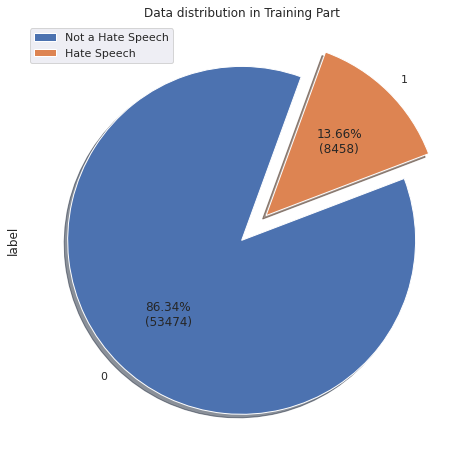

In [27]:
import seaborn as sns
x = trainingData.label.value_counts()
sns.set()
explode = (0, 0.2)
labels = [r'Not a Hate Speech','Hate Speech']
x.plot(kind='pie', title='Data distribution in Training Part', figsize=[8,8],shadow=True, legend=True,
       explode = explode,startangle=70,autopct=lambda p: '{:.2f}%\n({:.0f})'.format(p,(p/100)*x.sum()))
plt.legend(labels, loc="best")
plt.show()

### **Synonym Replacement**


In [ ]:
from nltk.corpus import wordnet
def get_synonyms(word):
  synonyms = set()
    
  for syn in wordnet.synsets(word):
    for l in syn.lemmas():
      synonym = l.name().replace("_", " ").replace("-", " ").lower()
      synonym = "".join([char for char in synonym if char in ' qwertyuiopasdfghjklzxcvbnm'])
      synonyms.add(synonym)
  if word in synonyms:
        synonyms.remove(word)
    
  return list(synonyms)

In [ ]:
get_synonyms('Jump')

['leap out',
 'stand out',
 'leap',
 'bound',
 'parachute',
 'derail',
 'pass over',
 'jumping',
 'skip over',
 'stick out',
 'parachuting',
 'jump off',
 'jump out',
 'saltation',
 'alternate',
 'start',
 'rise',
 'jumpstart',
 'skip',
 'startle',
 'climb up',
 'jump',
 'chute',
 'spring',
 'jump start']

In [ ]:
from nltk.corpus import stopwords
stop_words = []
for w in stopwords.words('english'):
    stop_words.append(w)
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
from nltk.corpus import wordnet

def synonym_replacement(words, n):
  #words = words.split()

  new_words = words.copy()
  random_word_list = list(set([word for word in words if word not in stop_words]))
  random.shuffle(random_word_list)
  num_replaced = 0
    
  for random_word in random_word_list:
    synonyms = get_synonyms(random_word)

    if len(synonyms) >= 1:
      synonym = random.choice(list(synonyms))
      new_words = [synonym if word == random_word else word for word in new_words]
      num_replaced += 1
        
    if num_replaced >= n: #only replace up to n words
      break

  sentence = ' '.join(new_words)

  return sentence

In [ ]:
trainingData[trainingData['label'] == 1].Text

15006    @user .@user gives white nationalist  troll a ...
1440     Most of them dont even work , but I have no do...
13824    #christians saying i am not racist is â¦ enou...
11514    i guess @user is talking about progress in the...
21966    and don't forget, that per megyn kelly of #fau...
                               ...                        
13872    work out the idea of creating a substantive ar...
21648    @user  here's @user being a racist troll. woul...
7624     It is in the nature of Jews to desecrate tradi...
42679    It seems that Allah sits around all day obsess...
19616    .@user are you seriously considering a perform...
Name: Text, Length: 2916, dtype: object

In [ ]:
n = 9
data_sr = trainingData.copy(deep=True)
data_sr['Text'] = trainingData[trainingData['label'] == 1].Text.apply(lambda x : synonym_replacement(nltk.word_tokenize(str(x)), 5))

In [ ]:
data_sr=data_sr.dropna()

### **Random Deletion**

In [ ]:
def random_deletion(words, p):
  #words = words.split()

  if len(words) == 1:
        return words

  new_words = []
  for word in words:
    r = random.uniform(0, 1)
    if r > p:
      new_words.append(word)

  if len(new_words) == 0:
    rand_int = random.randint(0, len(words)-1)
    return [words[rand_int]]

  sentence = ' '.join(new_words)
    
  return sentence

In [ ]:
p = 0.2
data_rd = trainingData.copy(deep=True)

data_rd['Text'] = trainingData[trainingData['label'] == 1].Text.apply(lambda j : random_deletion(nltk.word_tokenize(str(j)),p))
data_rd.head()

,Text,label
36381,NaN,0
17165,NaN,0
6108,NaN,0
15006,@ user . @ user nationalist troll a to spread ...,1
1300,NaN,0


In [ ]:
data_rd=data_rd.dropna()

### **Random Swap**

In [ ]:
def swap_word(new_words):
  random_idx_1 = random.randint(0, len(new_words)-1)
  random_idx_2 = random_idx_1
  counter = 0
    
  while random_idx_2 == random_idx_1:
    random_idx_2 = random.randint(0, len(new_words)-1)
    counter += 1
        
    if counter > 3:
      return new_words

  new_words[random_idx_1], new_words[random_idx_2] = new_words[random_idx_2], new_words[random_idx_1] 
  return new_words

In [ ]:
def random_swap(words, n):
  #words = words.split()
  new_words = words.copy()
  for _ in range(n):
    new_words = swap_word(new_words)
        
  sentence = ' '.join(new_words)
  return sentence

In [ ]:
n = 9
data_rs = trainingData.copy(deep=True)

data_rs['Text'] = trainingData[trainingData['label'] == 1].Text.apply(lambda j : random_swap(nltk.word_tokenize(str(j)),n))
data_rs.head()

,Text,label
36381,NaN,0
17165,NaN,0
6108,NaN,0
15006,user user . @ platform their of booâ¦ hate an...,1
1300,NaN,0


In [ ]:
data_rs = data_rs.dropna()

### **Random Insertion**

In [ ]:
def random_insertion(words, n):
  #words = words.split()
  new_words = words.copy()
  
  for _ in range(n):
    add_word(new_words)
        
  sentence = ' '.join(new_words)
  return sentence

def add_word(new_words):
  synonyms = []
  counter = 0
    
  while len(synonyms) < 1:
    random_word = new_words[random.randint(0, len(new_words)-1)]
    synonyms = get_synonyms(random_word)
    counter += 1
    if counter >= 10:
      return
        
  random_synonym = synonyms[0]
  random_idx = random.randint(0, len(new_words)-1)
  new_words.insert(random_idx, random_synonym)

In [ ]:
n = 9
data_ra = trainingData.copy(deep=True)
data_ra['Text'] = trainingData[trainingData['label'] == 1].Text.apply(lambda j : random_insertion(nltk.word_tokenize(str(j)),n))
data_ra.head()

,Text,label
36381,NaN,0
17165,NaN,0
6108,NaN,0
15006,@ user . trolling @ hatred user troll whatever...,1
1300,NaN,0


In [ ]:
data_ra = data_ra.dropna()

In [ ]:
data_sr

,Text,label
15006,@ user . @ user make white nationalistic troll...,1
1440,"almost of them dont eve work , but iodine have...",1
13824,# christian enjoin i am not antiblack is â¦ e...,1
11514,i guess @ substance abuser is blab out about a...,1
21966,"and do n't blank out , that per megyn kelly of...",1
...,...,...
13872,form out the theme of make a essential argumen...,1
21648,@ exploiter here 's @ exploiter being a racial...,1
7624,it is in the nature of Jews to profane custom ...,1
42679,it seems that allah sits around all day haunt ...,1


In [ ]:
tr_data = trainingData[trainingData['label'] == 1]

In [ ]:
tr_data

,Text,label
15006,@user .@user gives white nationalist troll a ...,1
1440,"Most of them dont even work , but I have no do...",1
13824,#christians saying i am not racist is â¦ enou...,1
11514,i guess @user is talking about progress in the...,1
21966,"and don't forget, that per megyn kelly of #fau...",1
...,...,...
13872,work out the idea of creating a substantive ar...,1
21648,@user here's @user being a racist troll. woul...,1
7624,It is in the nature of Jews to desecrate tradi...,1
42679,It seems that Allah sits around all day obsess...,1


In [ ]:
train_sr = pd.concat([tr_data, data_sr], ignore_index=True, sort=False)
print(train_sr)

                                                   Text  label
0     @user .@user gives white nationalist  troll a ...      1
1     Most of them dont even work , but I have no do...      1
2     #christians saying i am not racist is â¦ enou...      1
3     i guess @user is talking about progress in the...      1
4     and don't forget, that per megyn kelly of #fau...      1
...                                                 ...    ...
5827  form out the theme of make a essential argumen...      1
5828  @ exploiter here 's @ exploiter being a racial...      1
5829  it is in the nature of Jews to profane custom ...      1
5830  it seems that allah sits around all day haunt ...      1
5831  . @ user are you earnestly look at a functioni...      1

[5832 rows x 2 columns]


In [ ]:
data_sr.to_csv('train_data_sr.csv')

In [ ]:
sr1=data_sr

In [ ]:
sr1

,Text,label
15006,@ user . @ user make white nationalistic troll...,1
1440,"almost of them dont eve work , but iodine have...",1
13824,# christian enjoin i am not antiblack is â¦ e...,1
11514,i guess @ substance abuser is blab out about a...,1
21966,"and do n't blank out , that per megyn kelly of...",1
...,...,...
13872,form out the theme of make a essential argumen...,1
21648,@ exploiter here 's @ exploiter being a racial...,1
7624,it is in the nature of Jews to profane custom ...,1
42679,it seems that allah sits around all day haunt ...,1


In [ ]:
sr1.to_csv('train_data_hs_sr1.csv')

In [ ]:
train_rd = pd.concat([tr_data, data_rd], ignore_index=True, sort=False)
print(train_rd)

                                                   Text  label
0     @user .@user gives white nationalist  troll a ...      1
1     Most of them dont even work , but I have no do...      1
2     #christians saying i am not racist is â¦ enou...      1
3     i guess @user is talking about progress in the...      1
4     and don't forget, that per megyn kelly of #fau...      1
...                                                 ...    ...
5827  work the of creating argument making a point r...      1
5828  user here 's user being a troll would love for...      1
5829  in the to desecrate traditions of all and our ...      1
5830  It that Allah around all day obsessing about w...      1
5831  . @ user are you seriously considering a perfo...      1

[5832 rows x 2 columns]


In [ ]:
train_rs = pd.concat([tr_data, data_rs], ignore_index=True, sort=False)
print(train_rs)

                                                   Text  label
0     @user .@user gives white nationalist  troll a ...      1
1     Most of them dont even work , but I have no do...      1
2     #christians saying i am not racist is â¦ enou...      1
3     i guess @user is talking about progress in the...      1
4     and don't forget, that per megyn kelly of #fau...      1
...                                                 ...    ...
5827  substantive argument a idea the names.â¦ of a...      1
5828  word user here @ 's user a . racist troll you ...      1
5829  traditions to fools in sorts of Jews to It of ...      1
5830  It seems that on day and all . obsessing . wom...      1
5831  . # at lying performance seriously considering...      1

[5832 rows x 2 columns]


In [ ]:
train_ri = pd.concat([tr_data,data_ra], ignore_index=True, sort=False)
print(train_ri)

                                                   Text  label
0     @user .@user gives white nationalist  troll a ...      1
1     Most of them dont even work , but I have no do...      1
2     #christians saying i am not racist is â¦ enou...      1
3     i guess @user is talking about progress in the...      1
4     and don't forget, that per megyn kelly of #fau...      1
...                                                 ...    ...
5827  work piss telephone out telephone the idea tel...      1
5828  @ pervade user diffuse exploiter here 's @ use...      1
5829  fair sex custom It is deconsecrate jew in piss...      1
5830  vitamin a It express seems that Allah sits  ar...      1
5831  debate . severely severely @ user are lie lie ...      1

[5832 rows x 2 columns]


In [ ]:
train_rd.to_csv('train_data_hs_rd.csv')
train_rs.to_csv('train_data_hs_rs.csv')
train_ri.to_csv('train_data_hs_ri.csv')

In [ ]:
train_sr_rs = pd.concat([train_sr, data_rs], ignore_index=True, sort=False)
train_sr_rd = pd.concat([train_sr, data_rd], ignore_index=True, sort=False)
train_sr_ri = pd.concat([train_sr, data_ra], ignore_index=True, sort=False)
train_rs_rd = pd.concat([train_rs, data_rd], ignore_index=True, sort=False)
train_rs_ri = pd.concat([train_rs, data_ra], ignore_index=True, sort=False)
train_rd_ri = pd.concat([train_rd, data_ra], ignore_index=True, sort=False)

In [ ]:
train_sr_rs.to_csv('train_data_hs_sr_rs.csv')
train_sr_rd.to_csv('train_data_hs_sr_rd.csv')
train_sr_ri.to_csv('train_data_hs_sr_ri.csv')
train_rs_rd.to_csv('train_data_hs_rs_rd.csv')
train_rs_ri.to_csv('train_data_hs_rs_ri.csv')
train_rd_ri.to_csv('train_data_hs_rd_ri.csv')

In [ ]:
train_sr_rs_rd = pd.concat([train_sr_rs, data_rd], ignore_index=True, sort=False)
train_sr_rs_ri = pd.concat([train_sr_rs, data_ra], ignore_index=True, sort=False)
train_sr_ri_rd = pd.concat([train_sr_ri, data_rd], ignore_index=True, sort=False)
train_ri_rs_rd = pd.concat([data_ra, train_rs_rd], ignore_index=True, sort=False)

In [ ]:
train_sr_rs_rd.to_csv('train_data_hs_sr_rs_rd.csv')
train_sr_rs_ri.to_csv('train_data_hs_sr_rs_ri.csv')
train_sr_ri_rd.to_csv('train_data_hs_sr_ri_rd.csv')
train_ri_rs_rd.to_csv('train_data_hs_ri_rs_rd.csv')

In [ ]:
train_sr_rs_rd_ri = pd.concat([train_sr_rs_rd, data_ra], ignore_index=True, sort=False)

In [ ]:
train_sr_rs_rd_ri

,Text,label
0,@user .@user gives white nationalist troll a ...,1
1,"Most of them dont even work , but I have no do...",1
2,#christians saying i am not racist is â¦ enou...,1
3,i guess @user is talking about progress in the...,1
4,"and don't forget, that per megyn kelly of #fau...",1
...,...,...
14575,work piss telephone out telephone the idea tel...,1
14576,@ pervade user diffuse exploiter here 's @ use...,1
14577,fair sex custom It is deconsecrate jew in piss...,1
14578,vitamin a It express seems that Allah sits ar...,1


In [ ]:
train_sr_rs_rd_ri.label.value_counts()

1    14580
Name: label, dtype: int64

In [ ]:
train_non_hate = trainingData[trainingData['label'] == 0]

In [ ]:
frames = [train_sr_ri,train_non_hate]
aug_df = pd.concat(frames)

In [ ]:
aug_df

,Text,label
0,@user .@user gives white nationalist troll a ...,1
1,"Most of them dont even work , but I have no do...",1
2,#christians saying i am not racist is â¦ enou...,1
3,i guess @user is talking about progress in the...,1
4,"and don't forget, that per megyn kelly of #fau...",1
...,...,...
10376,"According to Mathieson 2015 , they had around ...",0
34949,hey guys just letting you know im am not gay s...,0
18417,#igers #instadaily purchase proscar | b...,0
25940,just two days away for my vintage flea market....,0


In [ ]:
aug_df= aug_df.drop_duplicates()

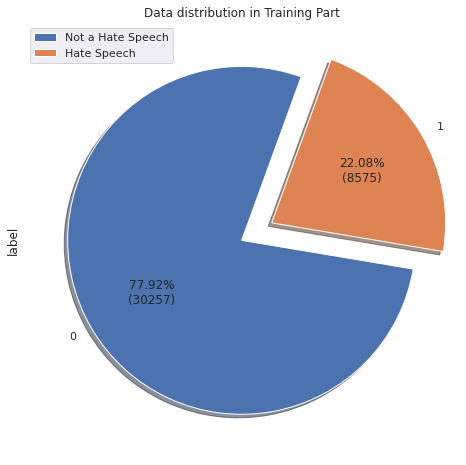

In [ ]:
import seaborn as sns
x = aug_df.label.value_counts()
sns.set()
explode = (0, 0.2)
labels = [r'Not a Hate Speech','Hate Speech']
x.plot(kind='pie', title='Data distribution in Training Part', figsize=[8,8],shadow=True, legend=True,
       explode = explode,startangle=70,autopct=lambda p: '{:.2f}%\n({:.0f})'.format(p,(p/100)*x.sum()))
plt.legend(labels, loc="best")
plt.show()

## Training Part(PreProcess)

In [ ]:
# Expansion of short form words
aug_df['Text'] = aug_df['Text'].apply(lambda x: TextExtractionCleanUP.preprocess_english(x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
TextExtractionCleanUP.preprocessing_method(aug_df,'Text')

/content/TextExtractionCleanUP.py:192: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col_name] = df[col_name].apply(lambda x: re.sub(r'(RT\s@[A-Za-z]+[A-Za-z0-9-_]+)', '', str(x)))
/content/TextExtractionCleanUP.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col_name] = df[col_name].apply(lambda x: re.sub(r'(@[A-Za-z0-9-_]+)', '', str(x)))
/content/TextExtractionCleanUP.py:196: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

,Text,label
0,gives white nationalist troll platform spread ...,1
1,dont even work doubt pushed high positions soc...,1
2,christians saying racist â enough protest deno...,1
3,guess talking progress advancement misogyny ho...,1
4,forget per megyn kelly fauxnews jesus santa al...,1
...,...,...
10376,according mathieson around incidence blue eyes...,0
34949,hey guys letting know im gay fuck hoes nipples...,0
18417,igers instadaily purchase proscar buy proscar ...,0
25940,two days away vintage flea market fashion vint...,0


In [ ]:
TextExtractionCleanUP.spellCheck(aug_df,'Text')

/content/TextExtractionCleanUP.py:225: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column_name] = df[column_name].apply(lambda x : spell(x))


In [ ]:
aug_df['Text'] = aug_df['Text'].apply(TextExtractionCleanUP.lemmatize_Tokenize_text)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
aug_df

,Text,label
0,"[give, white, nationalist, troll, platform, sp...",1
1,"[dont, even, work, doubt, pushed, high, positi...",1
2,"[christian, saying, racist, â, enough, protest...",1
3,"[guess, talking, progress, advancement, misogy...",1
4,"[forget, per, megan, kelly, fauxnews, jesus, s...",1
...,...,...
10376,"[according, mathieson, around, incidence, blue...",0
34949,"[hey, guy, letting, know, im, gay, fuck, doe, ...",0
18417,"[tiger, instadaily, purchase, proscar, buy, pr...",0
25940,"[two, day, away, vintage, flea, market, fashio...",0


In [ ]:
aug_df['Text2'] = aug_df.Text.apply(lambda x: str(x)[1:-1]) 
aug_df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Text,label,Text2
0,"[give, white, nationalist, troll, platform, sp...",1,"'give', 'white', 'nationalist', 'troll', 'plat..."
1,"[dont, even, work, doubt, pushed, high, positi...",1,"'dont', 'even', 'work', 'doubt', 'pushed', 'hi..."
2,"[christian, saying, racist, â, enough, protest...",1,"'christian', 'saying', 'racist', 'â', 'enough'..."
3,"[guess, talking, progress, advancement, misogy...",1,"'guess', 'talking', 'progress', 'advancement',..."
4,"[forget, per, megan, kelly, fauxnews, jesus, s...",1,"'forget', 'per', 'megan', 'kelly', 'fauxnews',..."
...,...,...,...
10376,"[according, mathieson, around, incidence, blue...",0,"'according', 'mathieson', 'around', 'incidence..."
34949,"[hey, guy, letting, know, im, gay, fuck, doe, ...",0,"'hey', 'guy', 'letting', 'know', 'im', 'gay', ..."
18417,"[tiger, instadaily, purchase, proscar, buy, pr...",0,"'tiger', 'instadaily', 'purchase', 'proscar', ..."
25940,"[two, day, away, vintage, flea, market, fashio...",0,"'two', 'day', 'away', 'vintage', 'flea', 'mark..."


In [ ]:
X_train = aug_df['Text2']
y_train = aug_df['label']

In [ ]:
# # set aside 20% of train and test data for evaluation
# X_train, X_val, y_train, y_val = train_test_split(train, test, test_size=0.2, shuffle = True, random_state = 8)


# print("X_train shape: {}".format(X_train.shape))
# print("X_val shape: {}".format(X_val.shape))
# print("y_train shape: {}".format(y_train.shape))
# print("y_val shape: {}".format(y_val.shape))


# print("========================")

# # Use the same function above for the validation set
# X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.25, random_state= 8) # 0.25 x 0.8 = 0.2


print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))
print("X_test shape: {}".format(X_test.shape))
print("y_test shape: {}".format(y_test.shape))



X_train shape: (38832,)
y_train shape: (38832,)
X_test shape: (11615,)
y_test shape: (11615,)


##Testing Part (PreProcess)

In [ ]:
X_test

29421    with so many delicious burger &amp; entree sel...
37898    @user truth is, it's doubtful that we're even ...
41138    when people speak of you, it should bring a sm...
17667    â #mexico headline inflation declined to -0....
8224                                                  No .
                               ...                        
20554    sad panda earrings by nrcr  via @user    #pand...
23630    and once again mass shooting in the usa .. can...
5870     You cannot judge the country and its people on...
34117    @user @user @user @user they have a wildlife t...
24608                  5 proven #habits that   people have
Name: Text, Length: 11615, dtype: object

In [ ]:
# Now pre processing testing data
testingData = pd.concat([X_test, y_test], axis=1, join='inner')
testingData

,Text,label
29421,with so many delicious burger &amp; entree sel...,0
37898,"@user truth is, it's doubtful that we're even ...",0
41138,"when people speak of you, it should bring a sm...",0
17667,â #mexico headline inflation declined to -0....,0
8224,No .,0
...,...,...
20554,sad panda earrings by nrcr via @user #pand...,0
23630,and once again mass shooting in the usa .. can...,0
5870,You cannot judge the country and its people on...,0
34117,@user @user @user @user they have a wildlife t...,0


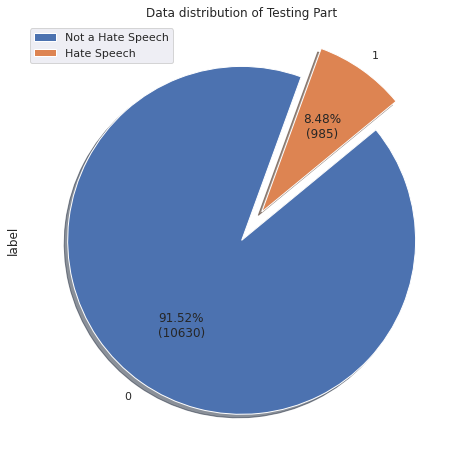

In [ ]:
x = testingData.label.value_counts()
sns.set()
explode = (0, 0.2)
labels = [r'Not a Hate Speech','Hate Speech']
x.plot(kind='pie', title='Data distribution of Testing Part', figsize=[8,8],shadow=True, legend=True,
       explode = explode,startangle=70,autopct=lambda p: '{:.2f}%\n({:.0f})'.format(p,(p/100)*x.sum()))
plt.legend(labels, loc="best")
plt.show()

In [ ]:
# Expansion of short form words
testingData['Text'] = testingData['Text'].apply(lambda x: TextExtractionCleanUP.preprocess_english(x))
TextExtractionCleanUP.preprocessing_method(testingData,'Text')
# SpellCheck
TextExtractionCleanUP.spellCheck(testingData,'Text')
# Lemmetize and tokenize
testingData['Text'] = testingData['Text'].apply(TextExtractionCleanUP.lemmatize_Tokenize_text)
testingData['Text2'] = testingData.Text.apply(lambda x: str(x)[1:-1]) 
testingData

,Text,label,Text2
29421,"[many, delicious, burger, entrez, selection, o...",0,"'many', 'delicious', 'burger', 'entrez', 'sele..."
37898,"[truth, doubtful, even, scratching, surface, d...",0,"'truth', 'doubtful', 'even', 'scratching', 'su..."
41138,"[people, speak, bring, smile, face, smile, fri...",0,"'people', 'speak', 'bring', 'smile', 'face', '..."
17667,"[â, mexico, headline, inflation, declined, may...",0,"'â', 'mexico', 'headline', 'inflation', 'decli..."
8224,[],0,
...,...,...,...
20554,"[sad, panda, earring, ncr, via, panda, earring]",0,"'sad', 'panda', 'earring', 'ncr', 'via', 'pand..."
23630,"[mass, shooting, usa, cannot, wait, right, bar...",0,"'mass', 'shooting', 'usa', 'cannot', 'wait', '..."
5870,"[cannot, judge, country, people, men, alone]",0,"'cannot', 'judge', 'country', 'people', 'men',..."
34117,"[wildlife, team, identifies, remove, gator, wi...",0,"'wildlife', 'team', 'identifies', 'remove', 'g..."


In [ ]:
X_test = testingData['Text2']
y_test = testingData['label']

In [ ]:
X_test

29421    'many', 'delicious', 'burger', 'entrez', 'sele...
37898    'truth', 'doubtful', 'even', 'scratching', 'su...
41138    'people', 'speak', 'bring', 'smile', 'face', '...
17667    'â', 'mexico', 'headline', 'inflation', 'decli...
8224                                                      
                               ...                        
20554    'sad', 'panda', 'earring', 'ncr', 'via', 'pand...
23630    'mass', 'shooting', 'usa', 'cannot', 'wait', '...
5870     'cannot', 'judge', 'country', 'people', 'men',...
34117    'wildlife', 'team', 'identifies', 'remove', 'g...
24608                          'proven', 'habit', 'people'
Name: Text2, Length: 11615, dtype: object

##MODELING

In [ ]:
vec = TfidfVectorizer()
tfidf_tr = vec.fit_transform(X_train)
#vec = get_feature_names_out()
tfidf_val = vec.transform(X_test)

In [ ]:
print(tfidf_tr.shape,tfidf_val.shape)

(38832, 39798) (11615, 39798)


In [ ]:
import numpy as np
import seaborn as sns
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, auc, average_precision_score, confusion_matrix, roc_auc_score
from tqdm import tqdm
import re
import nltk
from nltk.stem.porter import PorterStemmer
from textblob import Word
import datetime
import pandas as pd
import requests
import sys
sys.path.append("../py")

import gensim
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import matplotlib.pyplot as plt

def accuracy(y, y_hat):
    y_y_hat = list(zip(y, y_hat))
    tp = sum([1 for i in y_y_hat if i[0] == 1 and i[1] == 1])
    tn = sum([1 for i in y_y_hat if i[0] == 0 and i[1] == 0])
    return (tp + tn) / float(len(y_y_hat))

def f1(y, y_hat):
    precision_score = precision(y, y_hat)
    recall_score = recall(y, y_hat)
    numerator = precision_score * recall_score
    denominator = precision_score + recall_score
    return 2 * (numerator / denominator)

def precision(y, y_hat):
    y_y_hat = list(zip(y, y_hat))
    tp = sum([1 for i in y_y_hat if i[0] == 1 and i[1] == 1])
    fp = sum([1 for i in y_y_hat if i[0] == 0 and i[1] == 1])
    return tp / float(tp + fp)

def recall(y, y_hat):
    y_y_hat = list(zip(y, y_hat))
    # Find True Positive
    tp = sum([1 for i in y_y_hat if i[0] == 1 and i[1] == 1])
    # Find False Negative
    fn = sum([1 for i in y_y_hat if i[0] == 1 and i[1] == 0])
    return tp / float(tp + fn)

Accuracy:  0.9257856220404649
F1 Score:  0.29690048939641106
ROC-AUC:  0.8446600226349141
Recall:  0.1847715736040609
Precision:  0.7551867219917012
PR-AUC:  0.45893006823223026
              precision    recall  f1-score   support

           0       0.93      0.99      0.96     10630
           1       0.76      0.18      0.30       985

    accuracy                           0.93     11615
   macro avg       0.84      0.59      0.63     11615
weighted avg       0.91      0.93      0.90     11615



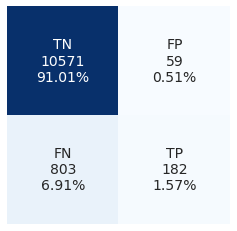

In [ ]:
nb = MultinomialNB()
nb.fit(tfidf_tr, y_train)
y_pr_nb_val = nb.predict(tfidf_val)
print(classification_report(y_test, y_pr_nb_val))

Accuracy:  0.9318984072320275
F1 Score:  0.43378668575518975
ROC-AUC:  0.8762202558604848
Recall:  0.30761421319796955
Precision:  0.7354368932038835
PR-AUC:  0.538878861390886
              precision    recall  f1-score   support

           0       0.94      0.99      0.96     10630
           1       0.74      0.31      0.43       985

    accuracy                           0.93     11615
   macro avg       0.84      0.65      0.70     11615
weighted avg       0.92      0.93      0.92     11615



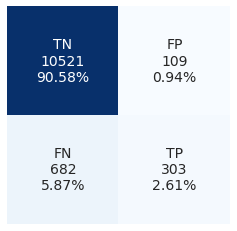

In [ ]:
rf = RandomForestClassifier(n_estimators=100).fit(tfidf_tr, y_train)
y_pr_rf_val = rf.predict(tfidf_val)
print(classification_report(y_test, y_pr_rf_val))

Accuracy:  0.913387860525183
F1 Score:  0.3559539052496799
ROC-AUC:  0.8138780197792856
Recall:  0.28223350253807106
Precision:  0.48180242634315423
PR-AUC:  0.3750601982890994
              precision    recall  f1-score   support

           0       0.94      0.97      0.95     10630
           1       0.48      0.28      0.36       985

    accuracy                           0.91     11615
   macro avg       0.71      0.63      0.65     11615
weighted avg       0.90      0.91      0.90     11615



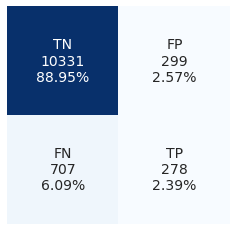

In [ ]:
abc = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),n_estimators=200).fit(tfidf_tr, y_train)
y_pr_abc_val = abc.predict(tfidf_val)
print(classification_report(y_test, y_pr_abc_val))

Accuracy:  0.9180370210934137
F1 Score:  0.13611615245009076
ROC-AUC:  0.7728704318302286
Recall:  0.07614213197969544
Precision:  0.6410256410256411
PR-AUC:  0.33036921790654505
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     10630
           1       0.64      0.08      0.14       985

    accuracy                           0.92     11615
   macro avg       0.78      0.54      0.55     11615
weighted avg       0.90      0.92      0.89     11615



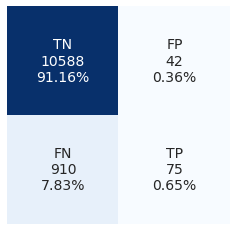

In [ ]:
gbc = GradientBoostingClassifier().fit(tfidf_tr, y_train)
y_pr_gbc_val = gbc.predict(tfidf_val)
print(classification_report(y_test, y_pr_gbc_val))

Accuracy:  0.9262160998708566
F1:  0.4620213433772756
Recall:  0.37360406091370557
Precision:  0.6052631578947368
ROC-AUC:  0.8599871066944907
PR-AUC:  0.5055876713909114
              precision    recall  f1-score   support

           0       0.94      0.98      0.96     10630
           1       0.61      0.37      0.46       985

    accuracy                           0.93     11615
   macro avg       0.77      0.68      0.71     11615
weighted avg       0.92      0.93      0.92     11615



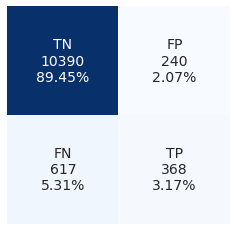

In [ ]:
from sklearn import svm
svc = svm.LinearSVC(random_state=42).fit(tfidf_tr, y_train)
y_pr_svc_val = svc.predict(tfidf_val)
print(classification_report(y_test, y_pr_svc_val))

Accuracy:  0.9244080929832114
F1 Score:  0.365606936416185
ROC-AUC:  0.8759760471035428
Recall:  0.2568527918781726
Precision:  0.6340852130325815
PR-AUC:  0.4799163166869373
              precision    recall  f1-score   support

           0       0.93      0.99      0.96     10630
           1       0.63      0.26      0.37       985

    accuracy                           0.92     11615
   macro avg       0.78      0.62      0.66     11615
weighted avg       0.91      0.92      0.91     11615



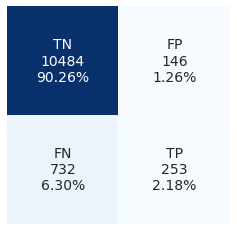

In [ ]:
log = LogisticRegression(random_state=42).fit(tfidf_tr, y_train)
y_pr_log_val = log.predict(tfidf_val)
print(classification_report(y_test, y_pr_log_val))

In [ ]:
data = {'Accuracy': [accuracy(y_test, y_pr_nb_val), 
                     accuracy(y_test, y_pr_rf_val), 
                     accuracy(y_test, y_pr_svc_val),
                     accuracy(y_test, y_pr_abc_val),
                     accuracy(y_test, y_pr_gbc_val)],
        'F1 Score': [f1(y_test, y_pr_nb_val), 
                     f1(y_test, y_pr_rf_val), 
                     f1(y_test, y_pr_svc_val),
                     f1(y_test, y_pr_abc_val),
                     f1(y_test, y_pr_gbc_val)],
        'Recall': [recall(y_test, y_pr_nb_val), 
                   recall(y_test, y_pr_rf_val), 
                   recall(y_test, y_pr_svc_val),
                   recall(y_test, y_pr_abc_val),
                   recall(y_test, y_pr_gbc_val)],
        'Precision': [precision(y_test, y_pr_nb_val), 
                      precision(y_test, y_pr_rf_val), 
                      precision(y_test, y_pr_svc_val),
                      precision(y_test, y_pr_abc_val),
                      precision(y_test, y_pr_gbc_val)]}
output = pd.DataFrame(data=data, index = ['Multinomial Naive Bayes', 
                                           'Random Forest',
                                           'Support Vector Machine', 
                                           'AdaBoost Classifier', 
                                           'Gradient Boosting Classifier'])

In [ ]:
output.to_csv("OutputWithNormalParamters.csv")
output

,Accuracy,F1 Score,Recall,Precision,ROC-AUC,PR-AUC
Multinomial Naive Bayes,0.925786,0.296900,0.184772,0.755187,0.844660,0.458930
Random Forest,0.931898,0.433787,0.307614,0.735437,0.876220,0.538879
Support Vector Machine,0.926216,0.462021,0.373604,0.605263,0.859987,0.505588
AdaBoost Classifier,0.913388,0.355954,0.282234,0.481802,0.813878,0.375060
Gradient Boosting Classifier,0.918037,0.136116,0.076142,0.641026,0.772870,0.330369


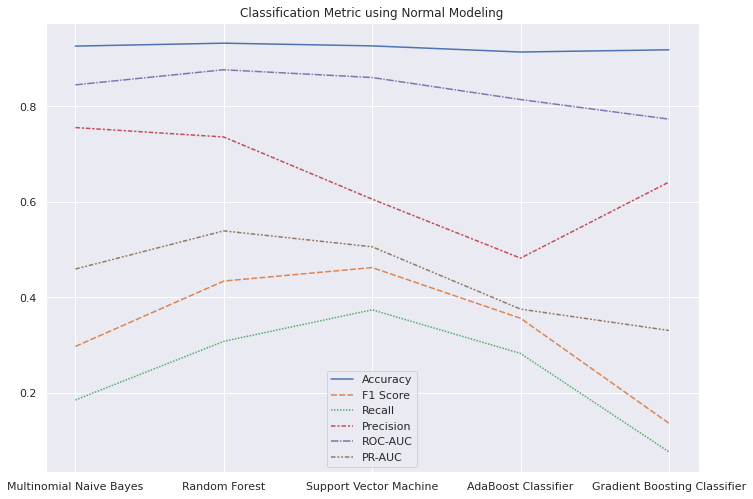

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.title("Classification Metric using Normal Modeling")
sns.lineplot(data=output)